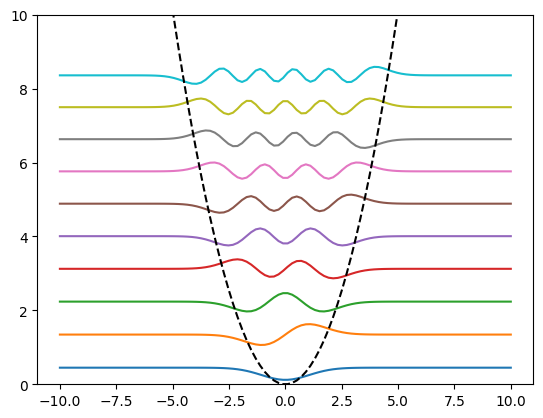

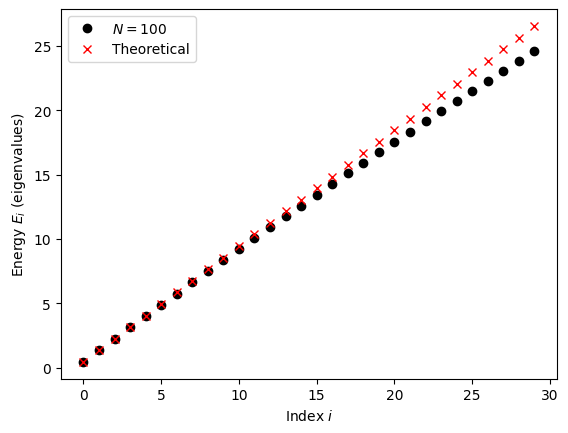

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def ham(x_pos, pot_array):
    # Arguments: 
    # * x_pos: values of the position space
    # * pot_array: potential values at each position in x_pos
    # Output:
    # * ham_matrix: a `N x N` matrix of the Hamiltonian

    N = len(x_pos)
    dx = x_pos[1] - x_pos[0]
    pot = np.diag(pot_array)
    kin = -((np.eye(N, N, k=+1) + np.eye(N, N, k=-1) - 2*np.eye(N, N, k=0))/((x_pos[1] - x_pos[0])**2))/2
    ham_matrix = pot + kin
    return ham_matrix

## For example, if my space is from -10<x<10 and my potential is V(x) = 0.5*(x^2):
N = 100
omega = 0.9
x_pos = np.linspace(-10, 10, N)
harmonic_pot = 0.5*(omega**2)*(x_pos**2)

harmonic_setup = ham(x_pos, harmonic_pot)
## where the matrix effectively depends on the potential I want to use

# Read the following:
# * `np.linalg.eigh`: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html
ho_eigvals, ho_eigvecs = np.linalg.eigh(harmonic_setup)

for i in range(10):
    plt.plot(x_pos, ho_eigvals[i] + ho_eigvecs[:,i])

plt.plot(x_pos, harmonic_pot, "k--")
plt.ylim(0, 10)
plt.show()

plt.plot(ho_eigvals[:30], "ko", label = "$N = 100$")
plt.plot(omega*(np.arange(30) + 0.5), "rx", label="Theoretical")
plt.xlabel(r"Index $i$")
plt.ylabel(r"Energy $E_i$ (eigenvalues)")
plt.legend()
plt.show()

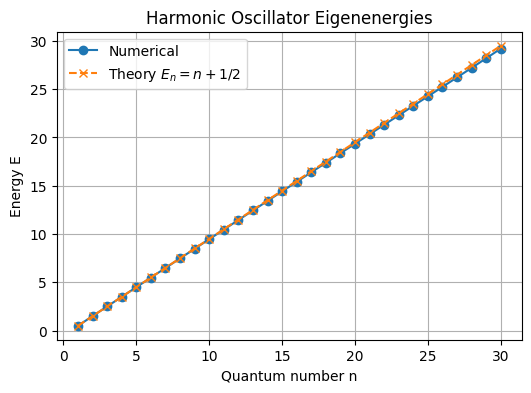

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigh

# Step 1: Discretize space
N = 200                      # number of grid points
x = np.linspace(-8, 8, N)    # domain
dx = x[1] - x[0]

# Step 2: Build Hamiltonian
V = 0.5 * x**2               # harmonic oscillator potential
diag = np.full(N, -2.0)
offdiag = np.full(N-1, 1.0)
D2 = (np.diag(diag) + np.diag(offdiag,1) + np.diag(offdiag,-1)) / dx**2
T = -0.5 * D2                # kinetic term (ħ = m = 1)
H = T + np.diag(V)           # Hamiltonian

# Step 3: Diagonalize
E, psi = eigh(H)

# Step 4: Take the lowest 30 eigenenergies
E30 = E[:30]

# Step 5: Plot them
plt.figure(figsize=(6,4))
plt.plot(range(1,31), E30, 'o-', label='Numerical')
plt.plot(range(1,31), [n+0.5 for n in range(30)], 'x--', label='Theory $E_n = n+1/2$')
plt.xlabel("Quantum number n")
plt.ylabel("Energy E")
plt.title("Harmonic Oscillator Eigenenergies")
plt.legend()
plt.grid(True)
plt.show()


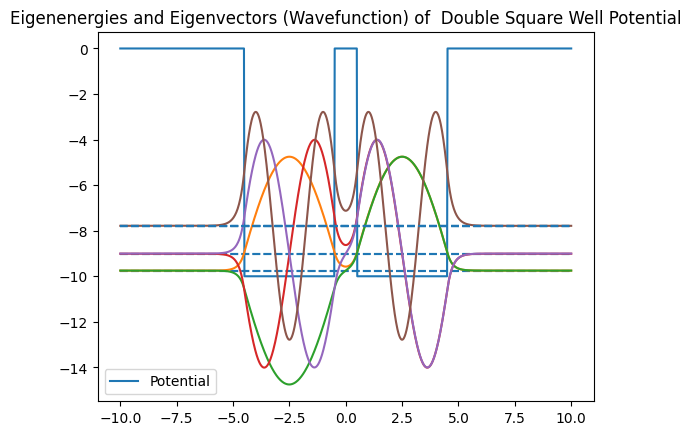

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#double square well potential ---
def double_square_well(x, depth, width, separation):
    # depth: depth of each well (positive number) -> V_o
    # width: half-width of each well
    # separation: center-to-center distance between wells -> x_a

    V = np.zeros_like(x)
    # Left well centered at -separation/2
    mask_left = (x > -separation/2 - width) & (x < -separation/2 + width)
    V[mask_left] = -depth
    # Right well centered at +separation/2
    mask_right = (x > separation/2 - width) & (x < separation/2 + width)
    V[mask_right] = -depth
    return V

# hamiltonian
def build_hamiltonian(x, V, mass=1.0, hbar=1.0):
    dx = x[1] - x[0]
    N = len(x)
    coeff = hbar**2 / (2 * mass * dx**2)

    # kinetic term (tridiagonal)
    diag = np.ones(N) * (2*coeff) + V
    off_diag = np.ones(N-1) * (-coeff)
    H = np.diag(diag) + np.diag(off_diag, 1) + np.diag(off_diag, -1)
    return H

#solving eigenenvectors and eigenvalues
def solve_eigenenergies(x, V, n_levels):
    H = build_hamiltonian(x, V)
    eigvals, eigvecs = np.linalg.eigh(H)
    return eigvals[:n_levels], eigvecs[:, :n_levels]

#try for -10 to 10, N = 1000
x = np.linspace(-10, 10, 1000)
depth = 10.0
width = 2.
separation = 5

V = double_square_well(x, depth = depth, width = width, separation = separation)
E_val, E_vec = solve_eigenenergies(x, V, n_levels = 5)

plt.plot(x, V, label = "Potential")
for i, E in enumerate(E_val):
    plt.hlines(E, x[0], x[-1], linestyle = 'dashed') 
for i in range(len(E_val)):
    psi = E_vec[:,i]
    psi = psi/(np.max(np.abs(psi))) * 5  
    plt.plot(x, psi + E_val[i])
    plt.hlines(E, x[0], x[-1], linestyle = 'dashed') 
plt.title("Eigenenergies and Eigenvectors (Wavefunction) of  Double Square Well Potential")
plt.legend()


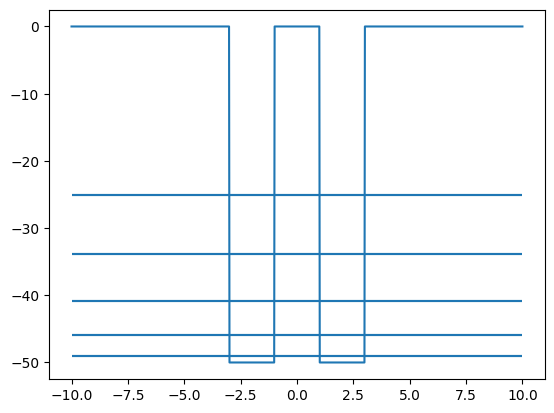

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#double square well potential ---
def double_square_well(x, depth, width, separation):
    # depth: depth of each well (positive number) -> V_o
    # width: half-width of the big well -> L/2
    # separation: distance between well to zero -> x_a

    V = np.zeros_like(x)
    # Left well centered at -separation/2
    mask_left = (x > -separation/2 - width) & (x < -separation/2 + width)
    V[mask_left] = -depth
    # Right well centered at +separation/2
    mask_right = (x > separation/2 - width) & (x < separation/2 + width)
    V[mask_right] = -depth
    return V

# hamiltonian
def build_hamiltonian(x, V, mass=1.0, hbar=1.0):
    dx = x[1] - x[0]
    N = len(x)
    coeff = hbar**2 / (2 * mass * dx**2)

    # kinetic term (tridiagonal)
    diag = np.ones(N) * (2*coeff) + V
    off_diag = np.ones(N-1) * (-coeff)
    H = np.diag(diag) + np.diag(off_diag, 1) + np.diag(off_diag, -1)
    return H

#solving eigenenvectors and eigenvalues
def solve_eigenenergies(x, V, n_levels):
    H = build_hamiltonian(x, V)
    eigvals, eigvecs = np.linalg.eigh(H)
    return eigvals[:n_levels], eigvecs[:, :n_levels]

#try for -10 to 10, N = 1000
x = np.linspace(-10, 10, 1000)
depth = 50.0
width = 1.0
separation = 4.0

V = double_square_well(x, depth = depth, width = width, separation = separation)
E_val, E_vec = solve_eigenenergies(x, V, n_levels = 10)

plt.plot(x, V)
for i, E in enumerate(E_val):
    plt.hlines(E, x[0], x[-1]) 